In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt

In [2]:
# parameters
#-----------
BOUND1, BOUND2 = [35.123211,-40.772981], [35.181822,-41.415206]

POIS = 'files/ds/test_city/extrapolated_visits.csv'
NUM_POIS=1000 # total number of POIs

Q = 100       # number of incoming queries per second
DUR = 20      # seconds (length of simulation)
Q_RES = 'files/ds/test_city/query_results.csv'

# Generate test-city POIs

In [3]:
from test_city import POI_layout, createPOIs, POI_query_layout

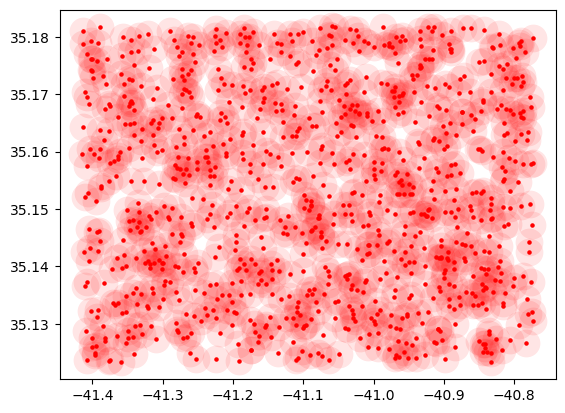

In [4]:
createPOIs(BOUND1, BOUND2, POIS, NUM_POIS)
POI_layout(POIS)

# Generate test-city queries

Simulate 100 incoming queries every 1 second for 20 seconds.
Set search radius to 5 Km.

In [5]:
from query_generator import generate

In [6]:
try:
    os.remove(Q_RES)
except Exception as e:
    print("INFO: file "+Q_RES+ " did not exist prior to this call")

bounds = [BOUND1, BOUND2]
generate(Q, dur=DUR, radius=5, SAVE_TO=Q_RES, bounds=bounds, FILE=POIS)

2000


# rearrange queries to represent different invocation frequencies

group over 1, 2 ,4, 8, 10 for 20 seconds

In [7]:
# group over 1

GROUP_BY = 1 # seconds
MAX = 20 # seconds

for city in ['test_city']:
    FROM = 'files/ds/'+city+'/query_results.csv'
    SAVE_TO = 'files/ds/'+city+'/queries/group_by1/query_result_'
    
    try:
        shutil.rmtree('files/ds/'+city+'/queries/group_by1')
    except Exception as e:
        print(str(e))
            
    try:
        os.mkdir('files/ds/'+city+'/queries/group_by1')
    except Exception as e:
        pass
    
    queries = pd.read_csv(FROM)
    time_groups = queries.groupby('time')

    for name, time_group in time_groups:
        index = name

        if index == MAX:
            break
        
        try:
            os.remove(SAVE_TO + str(index) + '.csv')
        except Exception as e:
            print("INFO: file "+SAVE_TO+str(index)+'.csv'+ " did not exist prior to this call")
        
        time_group.to_csv(SAVE_TO+str(index)+'.csv', index=False)

INFO: file files/ds/test_city/queries/group_by1/query_result_0.csv did not exist prior to this call
INFO: file files/ds/test_city/queries/group_by1/query_result_1.csv did not exist prior to this call
INFO: file files/ds/test_city/queries/group_by1/query_result_2.csv did not exist prior to this call
INFO: file files/ds/test_city/queries/group_by1/query_result_3.csv did not exist prior to this call
INFO: file files/ds/test_city/queries/group_by1/query_result_4.csv did not exist prior to this call
INFO: file files/ds/test_city/queries/group_by1/query_result_5.csv did not exist prior to this call
INFO: file files/ds/test_city/queries/group_by1/query_result_6.csv did not exist prior to this call
INFO: file files/ds/test_city/queries/group_by1/query_result_7.csv did not exist prior to this call
INFO: file files/ds/test_city/queries/group_by1/query_result_8.csv did not exist prior to this call
INFO: file files/ds/test_city/queries/group_by1/query_result_9.csv did not exist prior to this call


In [8]:
# group over the remaining durations (2,4,8,10)

for city in ['test_city']:
    for GROUP_BY in [2, 4, 8, 10]: # seconds
        FROM = 'files/ds/'+city+'/queries/group_by1/query_result_'
        SAVE_TO = 'files/ds/'+city+'/queries/group_by'+str(GROUP_BY)+'/query_result_'
        
        try:
            shutil.rmtree('files/ds/'+city+'/queries/group_by'+str(GROUP_BY))
        except Exception as e:
            print(str(e))
        
        try:
            os.mkdir('files/ds/'+city+'/queries/group_by'+str(GROUP_BY))
        except Exception as e:
            print(str(e))

        index_i = [x for x in range(MAX)]

        for i in index_i:
            queries = pd.read_csv(FROM+str(i)+'.csv')
            time_groups = queries.groupby('time')

            for name, time_group in time_groups:
                index = int(np.floor(name/GROUP_BY))

                if os.path.exists(SAVE_TO+str(index)+'.csv'):
                    time_group.to_csv(SAVE_TO+str(index)+'.csv', index=False, mode='a', header=False)
                else:
                    time_group.to_csv(SAVE_TO+str(index)+'.csv', index=False)

In [9]:
# verify all groups have the sam number of queries (no errors/ duplicats)

for city in ['test_city']:
    print('\n\n'+city+'\n--------\n')
    for GROUP_BY in [1, 2, 4, 8, 10]:
        FROM = 'files/ds/'+city+'/queries/group_by'+str(GROUP_BY)+'/query_result_'
        index_i = [x for x in range(int(np.ceil(MAX/GROUP_BY)))]
        sum_val = 0
        for i in index_i:
            queries = pd.read_csv(FROM+str(i)+'.csv')
            sum_val += len(queries)
        print("Group "+str(GROUP_BY) + ' has '+str(sum_val)+' queries')



test_city
--------

Group 1 has 2000 queries
Group 2 has 2000 queries
Group 4 has 2000 queries
Group 8 has 2000 queries
Group 10 has 2000 queries


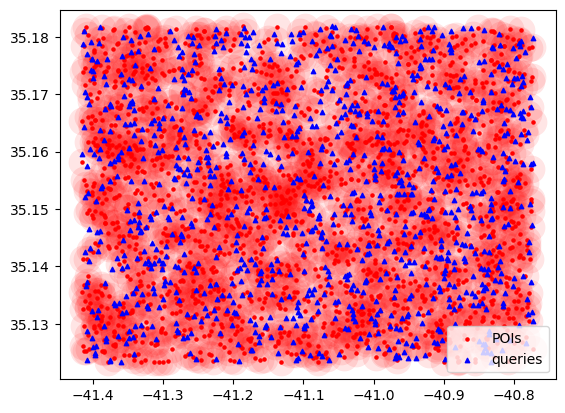

In [10]:
POI_query_layout(Q_RES, POIS)